## Step Monitoring System

This project analyzes data collected from a personal monitoring device over the course of two months, October and November, 2012. The device collected data at 5-minute intervals throughout the day, recording the number of steps the person took in each 5-minute interval.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
step_data = pd.read_csv('Data/activity.csv')
step_data['date'] = pd.to_datetime(step_data['date'])

step_data.shape

(17568, 3)

The variables in this dataset are:

* __steps__: Number of steps taken in a 5-minute interval

* __date__: The date on which the measurement was taken, in YYYY-MM-DD format

* __interval__: Identifier for the 5-minute interval

---

### 1) What is mean total number of steps taken per day?

To answer this question, we group the data by day, sum the values and take the mean. Next, we can create a histogram to get a better idea of the distribution of total steps per day.

In [4]:
avg_steps_per_day = step_data.groupby('date').sum().mean()['steps']
print('Mean steps per day: %5.1f' % avg_steps_per_day)

Mean steps per day: 10766.2


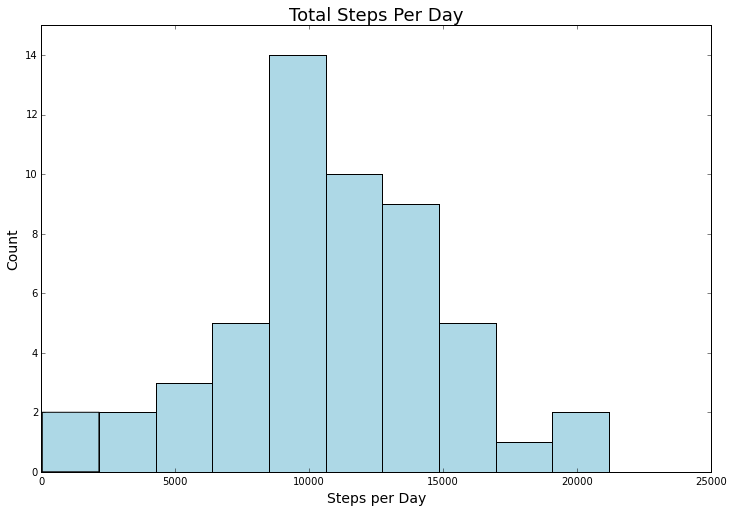

In [5]:
%matplotlib inline

# Get the sums for each day, remove the nans, then sort.
steps_per_day = step_data.groupby('date').sum()['steps']
steps_per_day = steps_per_day[~np.isnan(steps_per_day)]
steps_per_day = np.sort(steps_per_day.values)

# Create histogram using the ordered data
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(steps_per_day, 10, histtype='bar', facecolor='lightblue')
plt.ylim([0,15])
plt.xlabel('Steps per Day', size=14)
plt.ylabel('Count', size=14)
plt.title('Total Steps Per Day', size=18)
plt.show()

This is good. It looks like our subject is generally getting in more than 10,000 steps per day.

### 2) What is the average daily activity pattern?

We want to know something about the activity over the course of each day. To do this, we can get the average number of steps for each interval, averaged over all the days. Then we make a time-series plot of the 5-minute intervals and the average number of steps taken.

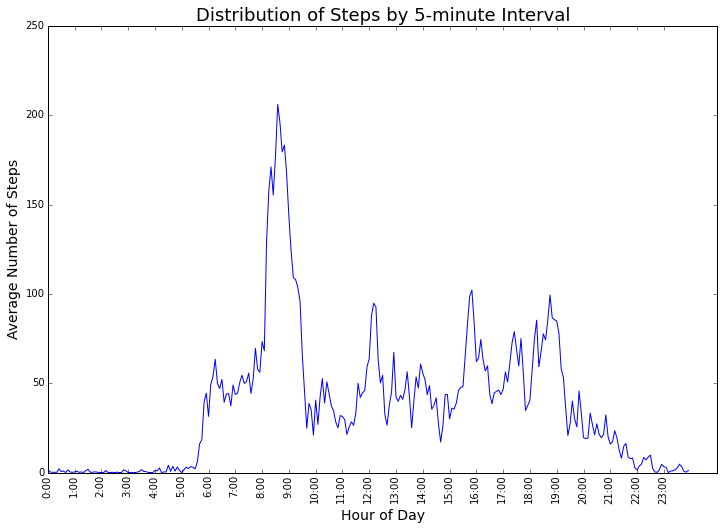

In [6]:
# Get the mean number of steps grouped by 5-minute interval
average_steps = step_data.groupby('interval').mean()

%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(average_steps)

ax.set_title('Distribution of Steps by 5-minute Interval', size=18)
ax.set_xlabel('Hour of Day', size=14)
ax.set_ylabel('Average Number of Steps', size=14)
ax.set_xticks(np.arange(0,288,12))
ax.set_xticklabels(['0:00','1:00','2:00','3:00','4:00','5:00',
                    '6:00','7:00','8:00','9:00','10:00','11:00',
                    '12:00','13:00','14:00','15:00','16:00','17:00',
                    '18:00','19:00','20:00','21:00','22:00','23:00'], rotation=90)

plt.show()

This distribution looks like something we might expect, with more activity during the day, starting around 6:00 a.m., and less at night.

Given this, we can figure out which 5-minute interval, on average across all the days in the dataset, contains the maximum number of steps.

In [7]:
max_interval = average_steps[average_steps['steps'] == np.max(average_steps['steps'])]
max_interval = max_interval.index.tolist()[0]
print('The interval with the most steps is %3.0f' % max_interval)

The interval with the most steps is 835


This corresponds to about 8:30 in the morning, perhaps while this person is running around getting ready for work.

### 3) Are there differences in activity patterns between weekdays and weekends?

What's this person up to on weekdays vs. weekends? Let's use their personal activity data to snoop on their life a bit more. First, we need to separate out the weekday data from the weekend data. Then we can create two plots comparing weekday and weekend activity, based on average steps per 5-minute interval.

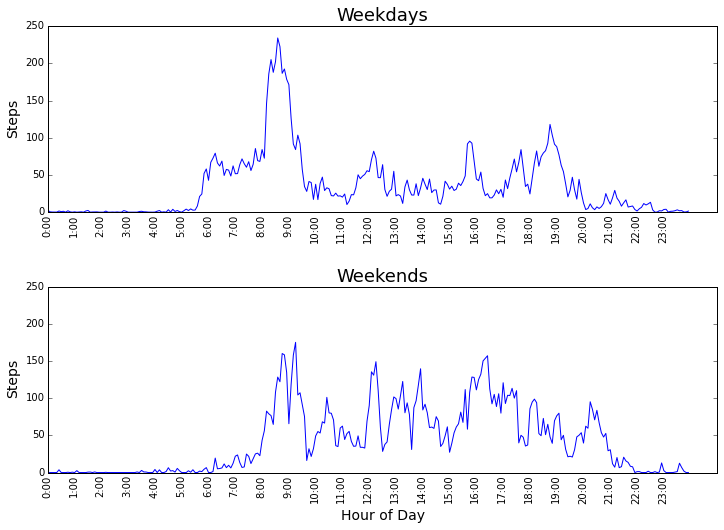

In [33]:
# Create a new column called 'weekday' that holds a number representing
# the day of the week, Monday=0, Sunday=6. Then get separate data frames
# based on the days of the week.
step_data['weekday'] = step_data['date'].apply(lambda x: x.weekday())
weekdays = step_data[step_data['weekday'] < 5]
weekends = step_data[step_data['weekday'] >= 5]

# Get the mean number of steps grouped by 5-minute interval
average_steps_weekdays = weekdays.groupby('interval').mean()['steps']
average_steps_weekends = weekends.groupby('interval').mean()['steps']

# Create separate plots for weekday and weekend
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))
plt.subplots_adjust(hspace=.4)

# We use this to convert the indices of the data frames to the
# corresponding hour of the day, to use on the x-axis.
hours = ['0:00','1:00','2:00','3:00','4:00','5:00',
        '6:00','7:00','8:00','9:00','10:00','11:00',
        '12:00','13:00','14:00','15:00','16:00','17:00',
        '18:00','19:00','20:00','21:00','22:00','23:00']

def set_ax(ax):
    '''Perform axis setup, which is the same on both plots'''
    ax.set_ylim([0,250])
    ax.set_ylabel('Steps', size=14)
    ax.set_xticks(np.arange(0,288,12))
    ax.set_xticklabels(hours, rotation=90)
    ax.xaxis.set_ticks_position('none')
    if ax == ax2:
        ax.set_xlabel('Hour of Day', size=14)

ax1.plot(average_steps_weekdays)
ax1.set_title('Weekdays', size=18)
set_ax(ax1)

ax2.plot(average_steps_weekends)
ax2.set_title('Weekends', size=18)
set_ax(ax2)

plt.show()

### Analysis

It's evident that this person tends to get up around 6:00 a.m. during the week, but sleeps in until about 8:00 a.m. on weekends. There's also a bit more activity during the day on weekends, which may suggest this person has a sedentary job during the week but likes to get out and about on weekends (or does more chores around the house perhaps). By 8:00 or 9:00 in the evening, the subject is either in bed or plopped down in front of the TV, computer, or video game, though there's more evening activity on the weekend. At least we're not seeing any evidence of sleepwalking at night, so that's a good thing.